In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import glob
from utils import get_id_from_path, load_patient_archive, load_radiomics, load_clinical_data,plot_patient_mask
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow
from tensorflow.keras.utils import to_categorical

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
path = 'data_train'

In [3]:
sklearn.__version__

'0.21.3'

In [4]:
def plot_patient_mask(path, patient_id):
    patient_id = str(patient_id).zfill(3)
    full_path = f'{path}/images/patient_{patient_id}.npz'
    archive = np.load(full_path)
    mask = archive['mask']
    x, y, z = mask.nonzero()
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, zdir='z', c='red')
    ax.set_xlim3d(0, 91)
    ax.set_ylim3d(0, 91)
    ax.set_zlim3d(0, 91)

    
    return patient_id

'002'

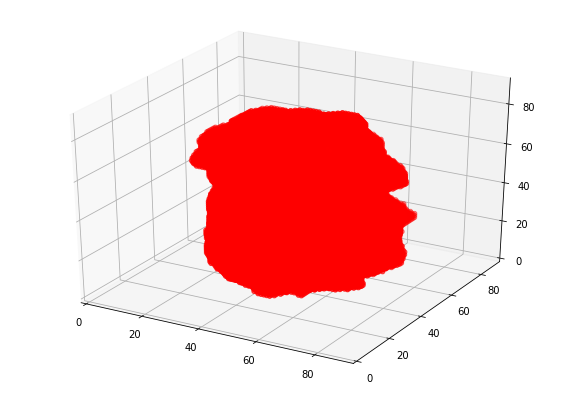

In [5]:
plot_patient_mask(path,2)

In [ ]:
patient_id = str(patient_id).zfill(3)
full_path = f'{path}/images/patient_{patient_id}.npz'
archive = np.load(full_path)
mask = archive['mask']
x, y, z = mask.nonzero()
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c='red')
ax.set_xlim3d(0, 91)
ax.set_ylim3d(0, 91)
ax.set_zlim3d(0, 91)

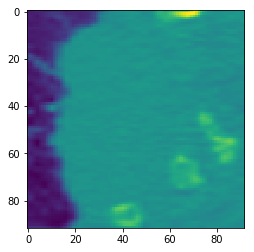

In [22]:
patient_id = str(2).zfill(3)
full_path = f'{path}/images/patient_{patient_id}.npz'
archive = np.load(full_path)
plt.imshow(archive['mask'][50])
plt.imshow(archive['scan'][50])

In [24]:
radiomics = load_radiomics('data_train').dropna()

In [28]:
list(radiomics.columns.values)

['original_shape_Compactness1',
 'original_shape_Compactness2',
 'original_shape_Maximum3DDiameter',
 'original_shape_SphericalDisproportion',
 'original_shape_Sphericity',
 'original_shape_SurfaceArea',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_VoxelVolume',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_Kurtosis',
 'original_firstorder_Maximum',
 'original_firstorder_Mean',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_Minimum',
 'original_firstorder_Range',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_Skewness',
 'original_firstorder_StandardDeviation',
 'original_firstorder_Uniformity',
 'original_firstorder_Variance',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterProminence',
 'original_glcm_ClusterShade',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_Correlation',
 'original_glcm_DifferenceEntropy',
 'original_glcm_Diff

In [30]:
clinical_data = load_clinical_data('data_train')

In [45]:
np.sort(np.unique(clinical_data.age.values))

array([42.5133, 43.    , 43.2827, 43.384 , 45.7276, 46.    , 46.5024,
       47.989 , 48.3532, 48.627 , 49.3415, 49.3443, 49.5113, 50.1958,
       51.    , 51.6906, 52.2491, 52.7118, 53.    , 53.0513, 53.0842,
       53.2293, 54.694 , 54.7242, 55.447 , 55.9151, 56.    , 56.1342,
       56.5969, 56.8214, 57.    , 57.295 , 58.1656, 58.1985, 58.809 ,
       59.    , 59.0329, 59.2334, 59.2936, 59.3566, 59.4141, 59.4223,
       59.7919, 59.8439, 60.0383, 60.0986, 60.2793, 60.4709, 60.6872,
       60.7283, 61.    , 61.1937, 61.2485, 61.7084, 61.7194, 62.    ,
       62.141 , 62.2505, 62.4011, 62.4476, 62.5654, 62.5955, 62.6639,
       62.9185, 63.    , 63.1567, 63.4689, 63.5318, 63.7454, 64.    ,
       64.0137, 64.1697, 64.1916, 64.3313, 64.5722, 64.5859, 64.8378,
       64.846 , 64.9555, 65.    , 65.0212, 65.0979, 65.1143, 65.117 ,
       65.2895, 65.3963, 65.4839, 66.    , 66.0452, 66.0534, 66.1191,
       66.8665, 66.9158, 66.9733, 67.    , 67.2745, 67.5866, 68.    ,
       68.0164, 68.0

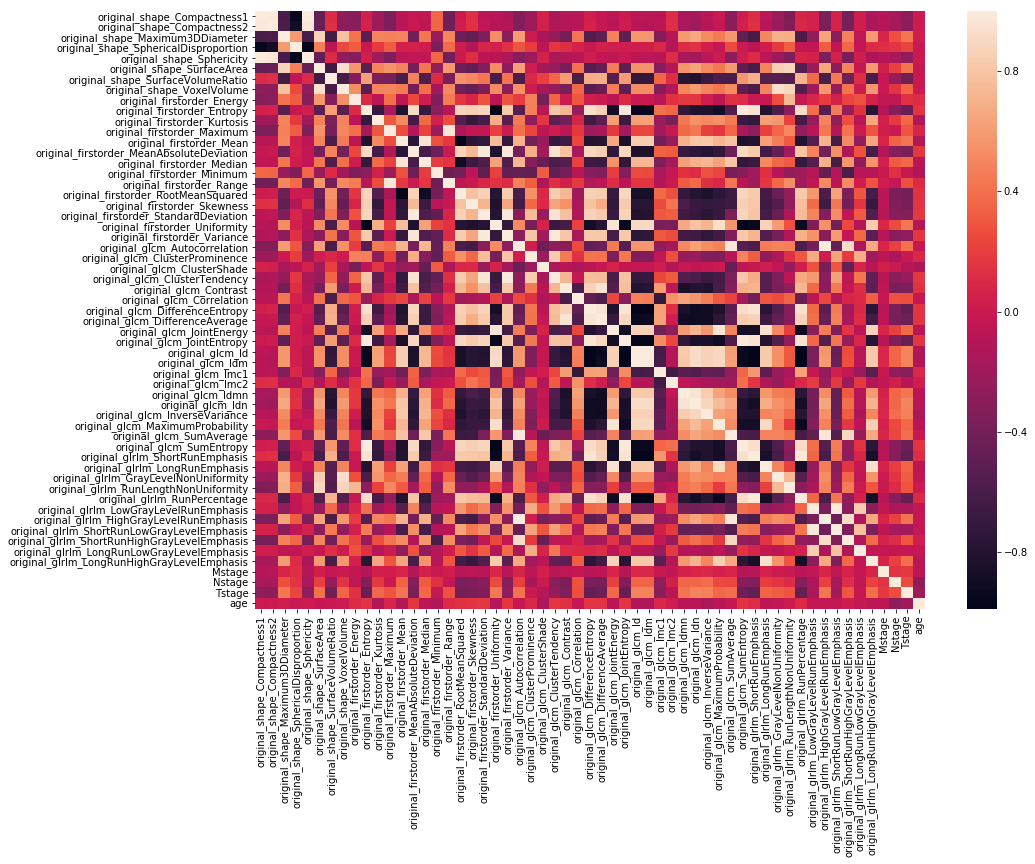

In [63]:
import seaborn as sb
concatenated_data = pd.concat([radiomics,clinical_data], axis=1)
plt.figure(figsize=(15,11))
sb.heatmap(concatenated_data.corr())

In [143]:
np.unique(np.sort(list(concatenated_data['Histology'].values)))

array(['Adenocarcinoma', 'NSCLC NOS (not otherwise specified)',
       'Squamous cell carcinoma', 'adenocarcinoma', 'large cell', 'nan',
       'nos', 'squamous cell carcinoma'], dtype='<U35')

In [144]:
label_encoder = LabelEncoder()
concatenated_data['Histology'] = concatenated_data['Histology'].fillna('__nan__')
concatenated_data['Histology'] = concatenated_data['Histology'].str.lower()
label_encoder.fit(np.sort(list(concatenated_data['Histology'].values)))
print(np.unique((np.sort(list(concatenated_data['Histology'].values)))))
encoded_data = label_encoder.transform(list(concatenated_data['Histology'].values))
concatenated_data['Histology']=encoded_data
concatenated_data['Histology'].replace(0, np.nan, inplace=True)
concatenated_data = concatenated_data.drop('SourceDataset', axis = 1)

['__nan__' 'adenocarcinoma' 'large cell' 'nos'
 'nsclc nos (not otherwise specified)' 'squamous cell carcinoma']


In [145]:
list_ =['__nan__',  'adenocarcinoma', 'large cell' ,'nos'
 'nsclc nos (not otherwise specified)', 'squamous cell carcinoma']
d= dict()#
d['histoligy'] = list_
d

{'histoligy': ['__nan__',
  'adenocarcinoma',
  'large cell',
  'nosnsclc nos (not otherwise specified)',
  'squamous cell carcinoma']}

In [34]:
concatenated_data

NameError: name 'concatenated_data' is not defined

In [147]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(concatenated_data)
IterativeImputer(random_state=0)
concatenated_data_without_nan = imp.transform(concatenated_data)
# the model learns that the second feature is double the first
#print(np.round(imp.transform(X_test)))
df = pd.DataFrame(concatenated_data_without_nan, index=concatenated_data.index, columns=concatenated_data.columns)

In [148]:
df.Histology = df.Histology.round()

In [156]:
to_categorical(df.Histology.values-1)[0:10]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [70]:
to_categorical(integer_encoded).shape[1]
columns_name = ['Histology' + '_' + str(j) for j in range(to_categorical(integer_encoded).shape[1])]


In [72]:
pd.DataFrame(to_categorical(integer_encoded), columns=columns_name)

,Histology_0,Histology_1,Histology_2,Histology_3,Histology_4,Histology_5,Histology_6,Histology_7
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
122,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
concatenated_data

,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,...,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,Histology,Mstage,Nstage,SourceDataset,Tstage,age
13,0.028885,0.296451,106.901824,1.499738,0.666783,29085.541425,0.114528,254069.0,2.006942e+09,3.073901,...,0.001094,554.111998,0.007535,4654.031976,nos,0,0,l1,4,44.3970
155,0.031948,0.362660,18.814888,1.402276,0.713126,629.443640,0.703879,911.0,2.623938e+08,5.206990,...,0.010836,529.644029,0.015633,639.621963,adenocarcinoma,0,3,l1,1,63.3183
404,0.015999,0.090945,105.080921,2.223687,0.449704,12509.265444,0.315298,39809.0,6.650322e+08,3.262327,...,0.001003,1181.377774,0.003027,7156.937667,large cell,0,2,l1,2,64.7255
407,0.031358,0.349373,46.968074,1.419832,0.704309,4067.657372,0.282104,14458.0,3.754287e+08,3.589861,...,0.001900,1182.876363,0.003685,4776.549408,nos,0,0,l1,2,65.3635
9,0.017815,0.112759,56.542020,2.069901,0.483115,7093.365690,0.376032,18942.0,9.108915e+09,5.067418,...,0.018221,331.901212,0.024175,400.015847,Adenocarcinoma,0,0,l2,2,50.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.018265,0.118528,107.689368,2.035759,0.491217,27445.826513,0.186456,147333.0,4.677261e+09,4.277393,...,0.000959,1037.171128,0.002582,3720.340006,squamous cell carcinoma,0,2,l1,3,70.7077
132,0.030501,0.330546,66.234432,1.446293,0.691423,10846.408584,0.177610,61130.0,2.332008e+09,3.577983,...,0.001362,1106.804923,0.004468,10587.822308,squamous cell carcinoma,0,3,l1,2,51.1595
169,0.033772,0.405243,33.301652,1.351330,0.740012,2984.694045,0.305787,9795.0,2.036047e+08,4.156201,...,0.001169,1016.447661,0.001609,1649.949406,Adenocarcinoma,0,1,l2,1,70.0000
199,0.015290,0.083061,140.249777,2.291923,0.436315,3619.332519,0.613355,5957.0,8.054723e+07,3.265867,...,0.001861,689.447819,0.004448,3770.308304,squamous cell carcinoma,0,3,l1,1,70.5106
